<a href="https://colab.research.google.com/github/pavan2131/dphi/blob/master/assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone 'https://github.com/dphi-official/Datasets/'

Cloning into 'Datasets'...
remote: Enumerating objects: 9874, done.
remote: Total 9874 (delta 0), reused 0 (delta 0), pack-reused 9874
Receiving objects: 100% (9874/9874), 427.70 MiB | 29.62 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Checking out files: 100% (9345/9345), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# To unzip train_beg.zip
!unzip /content/Datasets/animal_data/train_beg.zip 
 
# To unzip test_beg.zip
!unzip /content/Datasets/animal_data/test_beg.zip

unzip:  cannot find or open /content/Datasets/animal_data/train_beg.zip, /content/Datasets/animal_data/train_beg.zip.zip or /content/Datasets/animal_data/train_beg.zip.ZIP.
unzip:  cannot find or open /content/Datasets/animal_data/test_beg.zip, /content/Datasets/animal_data/test_beg.zip.zip or /content/Datasets/animal_data/test_beg.zip.ZIP.


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow

In [ ]:
# Loading training csv file
train_labels = pd.read_csv("/content/Datasets/animal_data/Training_set_animals.csv")
train_labels.head()    # display first five rows from train_labels dataframe

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [ ]:
image_paths = ['/content/train_beg/' + fname for fname in train_labels['filename']]
image_paths    # will get list of list of image id and image path


['/content/train_beg/Image_1.jpg',
 '/content/train_beg/Image_2.jpg',
 '/content/train_beg/Image_3.jpg',
 '/content/train_beg/Image_4.jpg',
 '/content/train_beg/Image_5.jpg',
 '/content/train_beg/Image_6.jpg',
 '/content/train_beg/Image_7.jpg',
 '/content/train_beg/Image_8.jpg',
 '/content/train_beg/Image_9.jpg',
 '/content/train_beg/Image_10.jpg',
 '/content/train_beg/Image_11.jpg',
 '/content/train_beg/Image_12.jpg',
 '/content/train_beg/Image_13.jpg',
 '/content/train_beg/Image_14.jpg',
 '/content/train_beg/Image_15.jpg',
 '/content/train_beg/Image_16.jpg',
 '/content/train_beg/Image_17.jpg',
 '/content/train_beg/Image_18.jpg',
 '/content/train_beg/Image_19.jpg',
 '/content/train_beg/Image_20.jpg',
 '/content/train_beg/Image_21.jpg',
 '/content/train_beg/Image_22.jpg',
 '/content/train_beg/Image_23.jpg',
 '/content/train_beg/Image_24.jpg',
 '/content/train_beg/Image_25.jpg',
 '/content/train_beg/Image_26.jpg',
 '/content/train_beg/Image_27.jpg',
 '/content/train_beg/Image_28.jpg',
 

In [ ]:
# Confirm if number of filepaths (i.e. images) is same as number of labels given
if len(train_labels) == len(image_paths):
    print('Number of labels i.e. ', len(train_labels), 'matches the number of filepaths i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filepaths')

Number of labels i.e.  1200 matches the number of filepaths i.e.  1200


In [ ]:
train_data = pd.DataFrame({'filename': train_labels['filename'], 'filepath': image_paths, 'animal_type': train_labels['animal_type']})
train_data.head()

,filename,filepath,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca


In [ ]:
print(train_data.iloc[578])

filename                          Image_579.jpg
filepath       /content/train_beg/Image_579.jpg
animal_type                               mucca
Name: 578, dtype: object


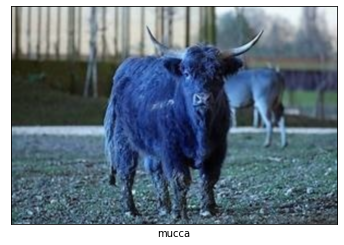

In [ ]:
view = cv2.imread('/content/train_beg/Image_579.jpg',1)
plt.imshow(view, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.xlabel(train_data.animal_type[579])
plt.show()

In [ ]:
data = []    # initialize a list to store, each image's pixel values 
labels = []   # initialize a list to store each image's labels i.e. animal type
for i in range(len(train_data)):
  img = cv2.imread(train_data['filepath'][i], cv2.IMREAD_GRAYSCALE)
  #image_arr = cv2.imread(train_data['filepath'][i],0)     # for each i starting from 0, convert the ith image to array of pixels
  image_arr = cv2.resize(image_arr,(200,200))
  data.append(image_arr)
  # We also need to convert the categorical values i.e. 'mucca' and 'pecora' to numerical
  # Using conditional statement, we can do it here only. if mucca then 0, if pecora then 1
  if train_data['animal_type'][i] == 'mucca':           # if respective image's label is mucca
    labels.append(0)
  else:               # since there are only two type of animals, if the animal is not mucca, it will be pecora
    labels.append(1)      # This indexing needs to be remembered 'mucca' = 0 and 'pecora' = 1, this will be required when you convert your predictions on test data to categorical value again

In [ ]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
print(type(data))

<class 'list'>


In [ ]:
img_array=np.asarray(data).astype(np.float32)
type(img_array)

numpy.ndarray

(200, 300, 3)


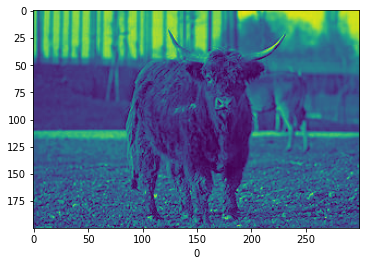

In [ ]:
print(view.shape)
plt.imshow(view[:,:,0])
plt.xlabel(labels[579])
plt.show()

In [ ]:
#split input and output values
x= np.asarray(data).astype(np.float32)
y= np.asarray(labels).astype(np.float32)

In [ ]:
print(x.shape)
print(y.shape)

(1200, 200, 200)
(1200,)


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 200, 200)
(240, 200, 200)
(960,)
(240,)


In [ ]:
x_train[0]

array([[220., 213., 210., ..., 246., 248., 250.],
       [222., 215., 212., ..., 246., 248., 250.],
       [223., 216., 213., ..., 246., 249., 252.],
       ...,
       [118.,  86.,  86., ..., 184., 172., 174.],
       [123.,  84.,  82., ..., 185., 172., 173.],
       [128.,  98.,  86., ..., 176., 169., 174.]], dtype=float32)

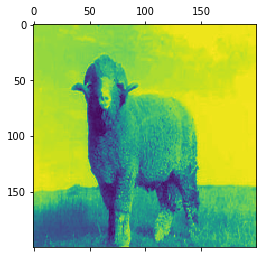

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

0.0

In [ ]:
#normalize the data
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([[0.8627451 , 0.8352941 , 0.8235294 , ..., 0.9647059 , 0.972549  ,
        0.98039216],
       [0.87058824, 0.84313726, 0.83137256, ..., 0.9647059 , 0.972549  ,
        0.98039216],
       [0.8745098 , 0.84705883, 0.8352941 , ..., 0.9647059 , 0.9764706 ,
        0.9882353 ],
       ...,
       [0.4627451 , 0.3372549 , 0.3372549 , ..., 0.72156864, 0.6745098 ,
        0.68235296],
       [0.48235294, 0.32941177, 0.32156864, ..., 0.7254902 , 0.6745098 ,
        0.6784314 ],
       [0.5019608 , 0.38431373, 0.3372549 , ..., 0.6901961 , 0.6627451 ,
        0.68235296]], dtype=float32)

In [ ]:
#Reshape x_train and x_test
xtrain = x_train.reshape(x_train.shape[0],200,200,1)
xtest = x_test.reshape(x_test.shape[0],200,200,1)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [ ]:
model = Sequential()

In [ ]:
model.add(Flatten(input_shape=[200, 200,1]))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(2, activation="softmax"))


In [ ]:
from tensorflow.keras.utils import plot_model

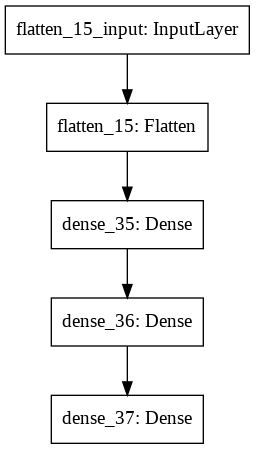

In [ ]:
#Visualize defined Model
plot_model(model)

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 40000)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 200)               8000200   
_________________________________________________________________
dense_36 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 202       
Total params: 8,020,502
Trainable params: 8,020,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [ ]:
#fitting the model
model_fit=model.fit(xtrain, y_train, validation_split=0.2, epochs=10, batch_size=10, verbose=1)


Epoch 1/10
77/77 [==============================] - 2s 29ms/step - loss: 7.5878 - accuracy: 0.5026 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 2/10
77/77 [==============================] - 2s 27ms/step - loss: 7.6692 - accuracy: 0.5078 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 3/10
77/77 [==============================] - 2s 27ms/step - loss: 7.6692 - accuracy: 0.5078 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 4/10
77/77 [==============================] - 2s 27ms/step - loss: 7.6692 - accuracy: 0.5078 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 5/10
77/77 [==============================] - 2s 28ms/step - loss: 7.6692 - accuracy: 0.5078 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 6/10
77/77 [==============================] - 2s 27ms/step - loss: 7.6692 - accuracy: 0.5078 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 7/10
77/77 [==============================] - 2s 27ms/step - loss: 7.6692 - accuracy: 0.5078 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 8/10
77

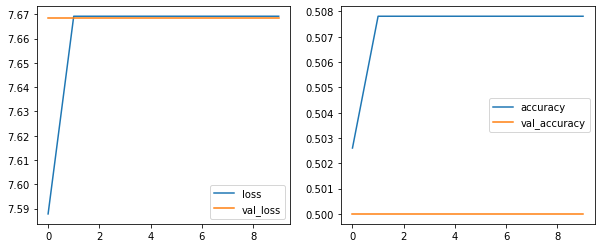

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(model_fit.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

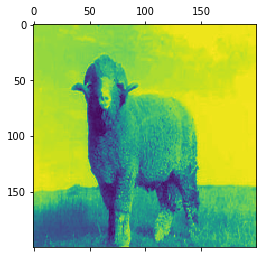

In [ ]:
plt.matshow(x_test[0])

In [ ]:
prediction = model.predict_classes(xtest)

In [ ]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Get the csv file given 'Testing_set_animals.csv'
test_labels = pd.read_csv("/content/Datasets/animal_data/Testing_set_animals.csv", names = ['filename'])  # there is no header in the csv file so we need to provide it. You can also do header = None
test_labels.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [ ]:
test_labels.shape

(400, 1)

In [ ]:
test_image = ['/content/train_beg/' + fname for fname in test_labels['filename']]
test_image

['/content/train_beg/Image_1.jpg',
 '/content/train_beg/Image_2.jpg',
 '/content/train_beg/Image_3.jpg',
 '/content/train_beg/Image_4.jpg',
 '/content/train_beg/Image_5.jpg',
 '/content/train_beg/Image_6.jpg',
 '/content/train_beg/Image_7.jpg',
 '/content/train_beg/Image_8.jpg',
 '/content/train_beg/Image_9.jpg',
 '/content/train_beg/Image_10.jpg',
 '/content/train_beg/Image_11.jpg',
 '/content/train_beg/Image_12.jpg',
 '/content/train_beg/Image_13.jpg',
 '/content/train_beg/Image_14.jpg',
 '/content/train_beg/Image_15.jpg',
 '/content/train_beg/Image_16.jpg',
 '/content/train_beg/Image_17.jpg',
 '/content/train_beg/Image_18.jpg',
 '/content/train_beg/Image_19.jpg',
 '/content/train_beg/Image_20.jpg',
 '/content/train_beg/Image_21.jpg',
 '/content/train_beg/Image_22.jpg',
 '/content/train_beg/Image_23.jpg',
 '/content/train_beg/Image_24.jpg',
 '/content/train_beg/Image_25.jpg',
 '/content/train_beg/Image_26.jpg',
 '/content/train_beg/Image_27.jpg',
 '/content/train_beg/Image_28.jpg',
 

In [ ]:
# Confirm if number of filepaths (i.e. images) is same as number of labels given
if len(test_labels) == len(test_image):
    print('Number of labels i.e. ', len(test_labels), 'matches the number of filepaths i.e. ', len(test_image))
else:
    print('Number of labels does not match the number of filepaths')

Number of labels i.e.  400 matches the number of filepaths i.e.  400


In [ ]:
test_data = pd.DataFrame({'filename': test_labels['filename'], 'filepath': test_image})
test_data.head()

,filename,filepath
0,Image_1.jpg,/content/train_beg/Image_1.jpg
1,Image_2.jpg,/content/train_beg/Image_2.jpg
2,Image_3.jpg,/content/train_beg/Image_3.jpg
3,Image_4.jpg,/content/train_beg/Image_4.jpg
4,Image_5.jpg,/content/train_beg/Image_5.jpg


In [ ]:
data1= []    # initialize a list to store, each image's pixel values 
labels1 = []   # initialize a list to store each image's labels i.e. animal type
for i in range(len(test_data)):
  image_arr1 = cv2.imread(test_data['filepath'][i],0) 
  image_arr1 = cv2.resize(image_arr1,(200,200))    # for each i starting from 0, convert the ith image to array of pixels
  data1.append(image_arr1)

In [ ]:
img_array1=np.asarray(data).astype(np.float32)
type(img_array1)

numpy.ndarray

In [ ]:
data1=np.asarray(data1).astype(np.float32)

In [ ]:
data1=data1/255
data1.shape

(400, 200, 200)

In [ ]:
test_data = data1.reshape(data1.shape[0],200,200,1)

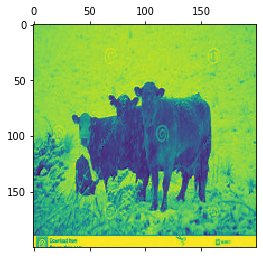

In [ ]:
plt.matshow(data1[0])

In [ ]:
prediction1 = model.predict_classes(test_data)


In [ ]:
prediction1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
type(prediction1)

numpy.ndarray

In [ ]:
predictions = []
for value in prediction1:
  if value <= 0.5:
    predictions.append('mucca')      # it can be 0 or your respective class 'mucca'
  else:
    predictions.append('pecora') 

In [ ]:
pred = np.round(prediction1)

In [ ]:
test_prediction = []
for item in predictions:
  test_prediction.append(item)

In [ ]:
test_prediction

['pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',

In [ ]:
res = pd.DataFrame({'filename': test_labels['filename'], 'animal_type': test_prediction})  # test_prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv") 

# To download the csv file locally
from google.colab import files        
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>